In [1]:
import pandas as pd
from sklearn.decomposition import PCA

import numpy as np

from numpy import genfromtxt
from numpy import linalg as LA

import warnings
warnings.filterwarnings('ignore')


from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read the pivot tables data

df_o = pd.read_csv('pivot_o.csv', skipinitialspace=True, sep=';', engine='python')
df_f = pd.read_csv('pivot_f.csv', skipinitialspace=True, sep=';', engine='python')
df_g = pd.read_csv('pivot_g.csv', skipinitialspace=True, sep=';', engine='python')

In [3]:
df_o

,Unnamed: 0,o__,o__Acidimicrobiales,o__Acidobacteriales,o__Actinomycetales,o__Aeromonadales,o__Alteromonadales,o__Anaeroplasmatales,o__Aquificales,o__Bacillales,...,o__SBla14,o__Sphaerochaetales,o__Spirobacillales,o__Sva0725,o__Thermoanaerobacterales,o__Thermogemmatisporales,o__Thiohalorhabdales,o__YLA114,o__Z20,o__mle1-48
0,10317.000052344,0.0,0.0,0.0,0.001334,0.0,0.0,0.0,0.0,0.000140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10317.000052366,0.0,0.0,0.0,0.007542,0.0,0.0,0.0,0.0,0.001019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10317.000052369,0.0,0.0,0.0,0.000838,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10317.00005237,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10317.000052372,0.0,0.0,0.0,0.000693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14093,MSM5LLIO,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14094,MSM5LLIQ,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14095,MSM5ZOJY,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14096,MSM633FF,0.0,0.0,0.0,0.000930,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# drop the names of the samples

data_o = df_o.drop('Unnamed: 0', axis = 1)
data_f = df_f.drop('Unnamed: 0', axis = 1)
data_g = df_g.drop('Unnamed: 0', axis = 1)

In [5]:
data_o.shape

(14098, 179)

In [6]:
# evaluate PCA - this was already calculated and stored to proj*.csv files, but we need it to calculate the inverse
pca = PCA(n_components=20)
pca.fit(data_o)

eigenvectors_o = pca.components_
eigenvalues_o = pca.explained_variance_

In [9]:
# perform PCA transformation
pca_o = pca.fit_transform(data_o)

In [10]:
# paths with the isomap reconstructed data

paths = [
    "./proj_o.csv"
]

for num in range(1,11) :
    name = "isomap_o_dim" + str(num) + "_reconstructed_pca.csv"
    paths.append(name)

In [11]:
paths

['./proj_o.csv',
 'isomap_o_dim1_reconstructed_pca.csv',
 'isomap_o_dim2_reconstructed_pca.csv',
 'isomap_o_dim3_reconstructed_pca.csv',
 'isomap_o_dim4_reconstructed_pca.csv',
 'isomap_o_dim5_reconstructed_pca.csv',
 'isomap_o_dim6_reconstructed_pca.csv',
 'isomap_o_dim7_reconstructed_pca.csv',
 'isomap_o_dim8_reconstructed_pca.csv',
 'isomap_o_dim9_reconstructed_pca.csv',
 'isomap_o_dim10_reconstructed_pca.csv']

In [12]:
# read the isomap reconstructed data

datasets = [np.genfromtxt(path, delimiter=';') for path in paths]

In [13]:
PCA_o = datasets[0]

In [14]:
print(PCA_o.shape)

(14098, 20)


# Repeat the fragment below for all reconstructed isomap datasets

In [24]:
from tqdm import tqdm_notebook
errors = []
for dataset in tqdm_notebook(datasets[1:]):
    # perform the inverse. Change the index at every iteration
    inverse = pca.inverse_transform(dataset)
    # calculate the mean average error as the differences divided by the sample values (see the report)
    diff = data_o.values - inverse
    abs_diff = np.apply_along_axis(np.linalg.norm, 1, diff, ord=2)
    abs_true = np.apply_along_axis(np.linalg.norm, 1, df_o.values[:, 1:], ord=2)
    #max_ = max(abs_true)
    #min_ = min(abs_true)
    mae = np.mean(abs_diff/abs_true)
    # add new error to the list
    errors.append(mae)

In [25]:
errors

[0.3052302744628466,
 0.06599741805146314,
 0.054121203790859926,
 0.044817990743954414,
 0.042251666841409026,
 0.04057870909054359,
 0.03970612513230103,
 0.03883152615816031,
 0.03823596248976385,
 0.038244580445901254]

In [128]:
errors

[0.30523027442050654,
 0.06599741346040792,
 0.05412119892860435,
 0.04481798578445261,
 0.04225166166322751,
 0.04057870391357813,
 0.03970612003168245,
 0.03883152120483207,
 0.03823595740417444,
 0.038244575579438764]

# Fragment ended

In [26]:
x = np.linspace(1, 10, 10,endpoint=True)

In [27]:
y = np.take(errors, range(0,10))

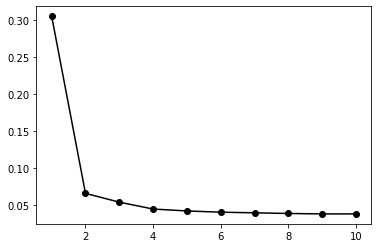

In [28]:
# plotting the errors

plt.plot(x, y, '-ok')